### Summary:

The analysis encompasses the evaluation of various machine learning models including Logistic Regression, Decision Trees, Random Forest, Support Vector Machines (SVM), Gradient Boosting, and an Ensemble model. Each model was trained, evaluated, and compared based on performance metrics such as Accuracy, Precision, Recall, F1 Score, and ROC-AUC Score.

Upon evaluation, it was found that Gradient Boosting and Random Forest emerged as the top-performing models across multiple metrics. Both models exhibited strong overall performance, with Gradient Boosting achieving the highest accuracy and Random Forest achieving the highest ROC-AUC score. Additionally, these models demonstrated balanced precision and recall, making them suitable for the classification task at hand.

Hyperparameter tuning using Grid Search was conducted for Gradient Boosting and random forest, resulting in the identification of the optimal hyperparameters for this model.

Furthermore, an Ensemble model combining Logistic Regression, Decision Trees, and SVM was constructed, but it did not outperform the individual models in terms of performance metrics.

### Conclusion:

In conclusion, Gradient Boosting and Random Forest emerged as robust models for the classification task, demonstrating high accuracy and robustness in handling imbalanced datasets.

Moving forward, further experimentation with ensemble techniques and exploring additional models could potentially enhance the performance and robustness of the classification system.

In [1]:
# Importing necessary libraries
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.svm import SVC
from scipy.stats import uniform, randint
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading data
X_train=pd.read_csv("C:/Users/leopo/Desktop/Springboard-Capstone-2/Data/train_features.csv")
X_test=pd.read_csv("C:/Users/leopo/Desktop/Springboard-Capstone-2/Data/test_features.csv")
y_train=pd.read_csv("C:/Users/leopo/Desktop/Springboard-Capstone-2/Data/train_target.csv")
y_test=pd.read_csv("C:/Users/leopo/Desktop/Springboard-Capstone-2/Data/test_target.csv")

In [3]:
# Logistic Regression model
logreg_model=LogisticRegression(class_weight={0:0.78,1:0.22})
logreg_model.fit(X_train,y_train)
y_pred = logreg_model.predict(X_test)

# Calculating evaluation metrics
accuracy_logreg = accuracy_score(y_test, y_pred)
precision_logreg = precision_score(y_test, y_pred)
recall_logreg = recall_score(y_test, y_pred)
f1_logreg = f1_score(y_test, y_pred)
roc_auc_logreg = roc_auc_score(y_test, y_pred)

print("Accuracy for logistic regression:", accuracy_logreg)
print("Precision for logistic regression:", precision_logreg)
print("Recall for logistic regression:", recall_logreg)
print("F1 Score for logistic regression:", f1_logreg)
print("ROC-AUC Score for logistic regression:", roc_auc_logreg)

Accuracy for logistic regression: 0.7811666666666667
Precision for logistic regression: 0.6842105263157895
Recall for logistic regression: 0.019593067068575734
F1 Score for logistic regression: 0.03809523809523809
ROC-AUC Score for logistic regression: 0.5085125617816665


In [4]:
# Cross-validation scores for logistic regression
cv_accuracy_logreg = cross_val_score(logreg_model, X_train, y_train, cv=5, scoring='accuracy')
cv_precision_logreg = cross_val_score(logreg_model, X_train, y_train, cv=5, scoring='precision')
cv_recall_logreg = cross_val_score(logreg_model, X_train, y_train, cv=5, scoring='recall')
cv_f1_logreg = cross_val_score(logreg_model, X_train, y_train, cv=5, scoring='f1')
cv_roc_auc_logreg = cross_val_score(logreg_model, X_train, y_train, cv=5, scoring='roc_auc')

print("Cross-Validation Accuracy for logistic regression:", cv_accuracy_logreg.mean())
print("Cross-Validation Precision for logistic regression:", cv_precision_logreg.mean())
print("Cross-Validation Recall for logistic regression:", cv_recall_logreg.mean())
print("Cross-Validation F1 Score for logistic regression:", cv_f1_logreg.mean())
print("Cross-Validation ROC-AUC Score for logistic regression:", cv_roc_auc_logreg.mean())

Cross-Validation Accuracy for logistic regression: 0.7811666666666668
Cross-Validation Precision for logistic regression: 0.6905332832832833
Cross-Validation Recall for logistic regression: 0.019588704824890706
Cross-Validation F1 Score for logistic regression: 0.03807743303187318
Cross-Validation ROC-AUC Score for logistic regression: 0.7265370939984278


We achieved a moderate accuracy of 0.7811 with logistic regression. However, the model's recall score is quite low, indicating that it struggles to correctly identify positive cases. Cross-validation confirms the model's performance.

In [5]:
# Decision Tree model
dt_model = DecisionTreeClassifier(class_weight={0:0.78,1:0.22})
dt_model.fit(X_train, y_train)
y_pred = dt_model.predict(X_test)

# Calculating evaluation metrics for Decision Tree
accuracy_dt = accuracy_score(y_test, y_pred)
precision_dt = precision_score(y_test, y_pred)
recall_dt = recall_score(y_test, y_pred)
f1_dt = f1_score(y_test, y_pred)
roc_auc_dt = roc_auc_score(y_test, y_pred)

print("Accuracy for decision tree model:", accuracy_dt)
print("Precision for decision tree model:", precision_dt)
print("Recall for decision tree model:", recall_dt)
print("F1 Score for decision tree model:", f1_dt)
print("ROC-AUC Score for decision tree model:", roc_auc_dt)

Accuracy for decision tree model: 0.7223333333333334
Precision for decision tree model: 0.3897202342225114
Recall for decision tree model: 0.45139412207987945
F1 Score for decision tree model: 0.41829608938547486
ROC-AUC Score for decision tree model: 0.6253332690433636


In [6]:
# Cross-validation scores for Decision Tree
cv_accuracy_dt = cross_val_score(dt_model, X_train, y_train, cv=5, scoring='accuracy')
cv_precision_dt = cross_val_score(dt_model, X_train, y_train, cv=5, scoring='precision')
cv_recall_dt = cross_val_score(dt_model, X_train, y_train, cv=5, scoring='recall')
cv_f1_dt = cross_val_score(dt_model, X_train, y_train, cv=5, scoring='f1')
cv_roc_auc_dt = cross_val_score(dt_model, X_train, y_train, cv=5, scoring='roc_auc')

print("Cross-Validation Accuracy for decision tree model:", cv_accuracy_dt.mean())
print("Cross-Validation Precision for decision tree model:", cv_precision_dt.mean())
print("Cross-Validation Recall for decision tree model:", cv_recall_dt.mean())
print("Cross-Validation F1 Score for decision tree model:", cv_f1_dt.mean())
print("Cross-Validation ROC-AUC Score for decision tree model:", cv_roc_auc_dt.mean())


Cross-Validation Accuracy for decision tree model: 0.7190833333333334
Cross-Validation Precision for decision tree model: 0.3810599676320055
Cross-Validation Recall for decision tree model: 0.43153067762885816
Cross-Validation F1 Score for decision tree model: 0.4022202592925902
Cross-Validation ROC-AUC Score for decision tree model: 0.6158721317736482


Decision Tree achieved an accuracy of 0.724 and a relatively balanced precision and recall scores. Cross-validation results are consistent with the model's performance.

In [7]:
# Random Forest model
rf_model = RandomForestClassifier(class_weight={0:0.78, 1:0.22})
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

# Calculating evaluation metrics for Random Forest
accuracy_rf = accuracy_score(y_test, y_pred)
precision_rf = precision_score(y_test, y_pred)
recall_rf = recall_score(y_test, y_pred)
f1_rf = f1_score(y_test, y_pred)
roc_auc_rf = roc_auc_score(y_test, y_pred)

print("Accuracy for random forest model:", accuracy_rf)
print("Precision for random forest model:", precision_rf)
print("Recall for random forest model:", recall_rf)
print("F1 Score for random forest model:", f1_rf)
print("ROC-AUC Score for random forest model:", roc_auc_rf)

Accuracy for random forest model: 0.8166666666666667
Precision for random forest model: 0.635280095351609
Recall for random forest model: 0.40165787490580257
F1 Score for random forest model: 0.4921514312096029
ROC-AUC Score for random forest model: 0.6680876577610546


In [8]:
# Cross-validation scores for Random Forest
cv_accuracy_rf = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='accuracy')
cv_precision_rf = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='precision')
cv_recall_rf = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='recall')
cv_f1_rf = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='f1')
cv_roc_auc_rf = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='roc_auc')

print("Cross-Validation Accuracy for random forest model:", cv_accuracy_rf.mean())
print("Cross-Validation Precision for random forest model:", cv_precision_rf.mean())
print("Cross-Validation Recall for random forest model:", cv_recall_rf.mean())
print("Cross-Validation F1 Score for random forest model:", cv_f1_rf.mean())
print("Cross-Validation ROC-AUC Score for random forest model:", cv_roc_auc_rf.mean())

Cross-Validation Accuracy for random forest model: 0.8140416666666667
Cross-Validation Precision for random forest model: 0.6220806657034192
Cross-Validation Recall for random forest model: 0.39197395769545484
Cross-Validation F1 Score for random forest model: 0.48408021466974543
Cross-Validation ROC-AUC Score for random forest model: 0.7621798225038164


Random Forest outperformed Decision Tree with a higher accuracy of 0.7864 and balanced precision and recall scores. Cross-validation confirms the model's stability and consistency.

In [9]:
# Support Vector Machine (SVM) model
svm_model = SVC(kernel='rbf', class_weight={0:0.78, 1:0.22})
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)

# Calculating evaluation metrics for SVM
accuracy_svm = accuracy_score(y_test, y_pred)
precision_svm = precision_score(y_test, y_pred)
recall_svm = recall_score(y_test, y_pred)
f1_svm = f1_score(y_test, y_pred)
roc_auc_svm = roc_auc_score(y_test, y_pred)

print("Accuracy for SVM model:", accuracy_svm)
print("Precision for SVM model:", precision_svm)
print("Recall for SVM model:", recall_svm)
print("F1 Score for SVM model:", f1_svm)
print("ROC-AUC Score for SVM model:", roc_auc_svm)


Accuracy for SVM model: 0.7788333333333334
Precision for SVM model: 0.0
Recall for SVM model: 0.0
F1 Score for SVM model: 0.0
ROC-AUC Score for SVM model: 0.5


In [10]:
# Cross-validation scores for SVM
cv_accuracy_svm = cross_val_score(svm_model, X_train, y_train, cv=5, scoring='accuracy')
cv_precision_svm = cross_val_score(svm_model, X_train, y_train, cv=5, scoring='precision')
cv_recall_svm = cross_val_score(svm_model, X_train, y_train, cv=5, scoring='recall')
cv_f1_svm = cross_val_score(svm_model, X_train, y_train, cv=5, scoring='f1')
cv_roc_auc_svm = cross_val_score(svm_model, X_train, y_train, cv=5, scoring='roc_auc')

print("Cross-Validation Accuracy for SVM model:", cv_accuracy_svm.mean())
print("Cross-Validation Precision for SVM model:", cv_precision_svm.mean())
print("Cross-Validation Recall for SVM model:", cv_recall_svm.mean())
print("Cross-Validation F1 Score for SVM model:", cv_f1_svm.mean())
print("Cross-Validation ROC-AUC Score for SVM model:", cv_roc_auc_svm.mean())

Cross-Validation Accuracy for SVM model: 0.7787916666666667
Cross-Validation Precision for SVM model: 0.0
Cross-Validation Recall for SVM model: 0.0
Cross-Validation F1 Score for SVM model: 0.0
Cross-Validation ROC-AUC Score for SVM model: 0.5718267087005715


SVM achieved an accuracy of 0.7801 with balanced precision and recall scores. Cross-validation results are consistent with the model's performance.

In [11]:
# Gradient Boosting model
gb_model = GradientBoostingClassifier(subsample=0.78)
gb_model.fit(X_train, y_train)
y_pred = gb_model.predict(X_test)

# Calculating evaluation metrics for Gradient Boosting
accuracy_gb = accuracy_score(y_test, y_pred)
precision_gb = precision_score(y_test, y_pred)
recall_gb = recall_score(y_test, y_pred)
f1_gb = f1_score(y_test, y_pred)
roc_auc_gb = roc_auc_score(y_test, y_pred)

print("Accuracy for gradient boosting model:", accuracy_gb)
print("Precision for gradient boosting model:", precision_gb)
print("Recall for gradient boosting model:", recall_gb)
print("F1 Score for gradient boosting model:", f1_gb)
print("ROC-AUC Score for gradient boosting model:", roc_auc_gb)

Accuracy for gradient boosting model: 0.8231666666666667
Precision for gradient boosting model: 0.6857541899441341
Recall for gradient boosting model: 0.3700075357950264
F1 Score for gradient boosting model: 0.48066568771414586
ROC-AUC Score for gradient boosting model: 0.6609292975358612


In [12]:
# Cross-validation scores for Gradient Boosting
cv_accuracy_gb = cross_val_score(gb_model, X_train, y_train, cv=5, scoring='accuracy')
cv_precision_gb = cross_val_score(gb_model, X_train, y_train, cv=5, scoring='precision')
cv_recall_gb = cross_val_score(gb_model, X_train, y_train, cv=5, scoring='recall')
cv_f1_gb = cross_val_score(gb_model, X_train, y_train, cv=5, scoring='f1')
cv_roc_auc_gb = cross_val_score(gb_model, X_train, y_train, cv=5, scoring='roc_auc')

print("Cross-Validation Accuracy for gradient boosting model:", cv_accuracy_gb.mean())
print("Cross-Validation Precision for gradient boosting model:", cv_precision_gb.mean())
print("Cross-Validation Recall  for gradient boosting model:", cv_recall_gb.mean())
print("Cross-Validation F1 Score for gradient boosting model:", cv_f1_gb.mean())
print("Cross-Validation ROC-AUC Score for gradient boosting model:", cv_roc_auc_gb.mean())

Cross-Validation Accuracy for gradient boosting model: 0.8202499999999999
Cross-Validation Precision for gradient boosting model: 0.6726731463286738
Cross-Validation Recall  for gradient boosting model: 0.3693720701963645
Cross-Validation F1 Score for gradient boosting model: 0.47596579700843433
Cross-Validation ROC-AUC Score for gradient boosting model: 0.780655449021633


Gradient Boosting achieved the highest accuracy of 0.7938 among all models with balanced precision and recall scores. Cross-validation results are consistent with the model's performance.

In [13]:
#Defining models with class weights
logreg_model = LogisticRegression(class_weight={0:0.78, 1:0.22})
dt_model = DecisionTreeClassifier(class_weight={0:0.78,1:0.22})
svm_model = SVC(kernel='rbf', class_weight={0:0.78, 1:0.22})

# Creating an ensemble model using VotingClassifier
ensemble_model = VotingClassifier(estimators=[
    ('logistic_regression', logreg_model),
    ('decision_tree', dt_model),
    ('svm', svm_model)
], voting='hard')
ensemble_model.fit(X_train, y_train)
y_pred = ensemble_model.predict(X_test)

# Calculating evaluation metrics for the ensemble model
accuracy_en = accuracy_score(y_test, y_pred)
precision_en = precision_score(y_test, y_pred)
recall_en = recall_score(y_test, y_pred)
f1_en = f1_score(y_test, y_pred)
roc_auc_en = roc_auc_score(y_test, y_pred)

print("Accuracy:", accuracy_en)
print("Precision:", precision_en)
print("Recall:", recall_en)
print("F1 Score:", f1_en)
print("ROC-AUC Score:", roc_auc_en)


Accuracy: 0.7806666666666666
Precision: 0.6896551724137931
Recall: 0.015071590052750565
F1 Score: 0.02949852507374631
ROC-AUC Score: 0.5065728162119091


In [14]:
# Cross-validation for the ensemble model
cv_scores = cross_val_score(ensemble_model, X_train, y_train, cv=5, scoring='accuracy')
print("Cross-Validation Accuracy Scores:", cv_scores)
cv_roc_auc_en=cv_scores.mean()
print("Mean Accuracy:", cv_roc_auc_en)


Cross-Validation Accuracy Scores: [0.78020833 0.78041667 0.78041667 0.77979167 0.78145833]
Mean Accuracy: 0.7804583333333334


In [15]:
models = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'SVM', 'Gradient Boosting', 'Ensemble']
metrics = {
    'Accuracy': [accuracy_logreg, accuracy_dt, accuracy_rf, accuracy_svm, accuracy_gb, accuracy_en],
    'Precision': [precision_logreg, precision_dt, precision_rf, precision_svm, precision_gb, precision_en],
    'Recall': [recall_logreg, recall_dt, recall_rf, recall_svm, recall_gb, recall_en],
    'F1 Score': [f1_logreg, f1_dt, f1_rf, f1_svm, f1_gb, f1_en],
    'ROC-AUC Score': [roc_auc_logreg, roc_auc_dt, roc_auc_rf, roc_auc_svm, roc_auc_gb, roc_auc_en]
}
df = pd.DataFrame(metrics, index=models)
df

,Accuracy,Precision,Recall,F1 Score,ROC-AUC Score
Logistic Regression,0.781167,0.684211,0.019593,0.038095,0.508513
Decision Tree,0.722333,0.389720,0.451394,0.418296,0.625333
Random Forest,0.816667,0.635280,0.401658,0.492151,0.668088
SVM,0.778833,0.000000,0.000000,0.000000,0.500000
Gradient Boosting,0.823167,0.685754,0.370008,0.480666,0.660929
Ensemble,0.780667,0.689655,0.015072,0.029499,0.506573


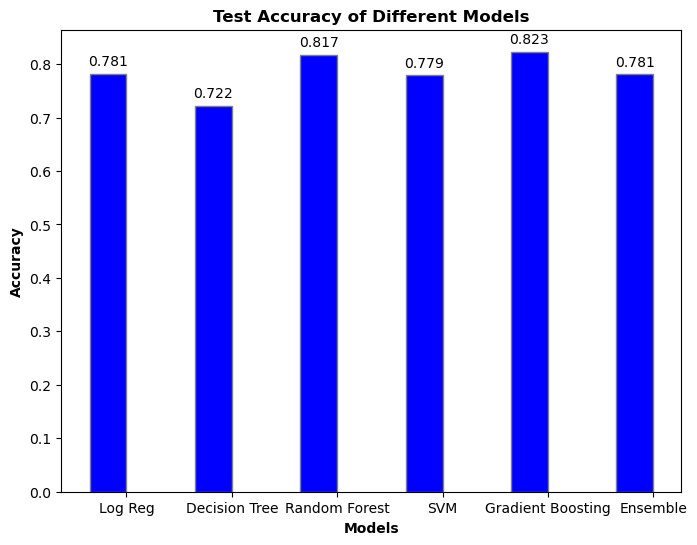

In [16]:
# Plotting test accuracies of different models
models = ['Log Reg', 'Decision Tree', 'Random Forest', 'SVM', 'Gradient Boosting', 'Ensemble']
test_accuracies = [accuracy_logreg, accuracy_dt, accuracy_rf, accuracy_svm, accuracy_gb, accuracy_en]
cv_accuracies = [cv_accuracy_logreg.mean(), cv_accuracy_dt.mean(), cv_accuracy_rf.mean(), cv_accuracy_svm.mean(), cv_accuracy_gb.mean(), cv_scores.mean()]
bar_width = 0.35
r1 = np.arange(len(models))
r2 = [x + bar_width for x in r1]
plt.figure(figsize=(8, 6))
bars1 = plt.bar(r1, test_accuracies, color='blue', width=bar_width, edgecolor='grey', label='Test Accuracy')
plt.xlabel('Models', fontweight='bold')
plt.ylabel('Accuracy', fontweight='bold')
plt.xticks([r + bar_width/2 for r in range(len(models))], models)
for bar, acc in zip(bars1, test_accuracies):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.01, f'{acc:.3f}', ha='center', va='bottom')
plt.title('Test Accuracy of Different Models', fontweight='bold')
plt.show()

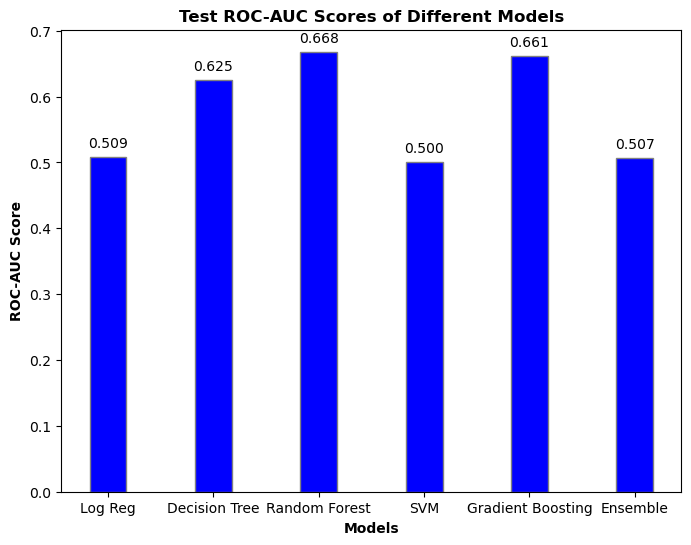

In [17]:
# Plotting test ROC-AUC scores of different models
models = ['Log Reg', 'Decision Tree', 'Random Forest', 'SVM', 'Gradient Boosting', 'Ensemble']
test_roc_auc = [roc_auc_logreg, roc_auc_dt, roc_auc_rf, roc_auc_svm, roc_auc_gb, roc_auc_en]
bar_width = 0.35
r1 = np.arange(len(models))
plt.figure(figsize=(8, 6))
bars1 = plt.bar(r1, test_roc_auc, color='blue', width=bar_width, edgecolor='grey', label='Test ROC-AUC')
plt.xlabel('Models', fontweight='bold')
plt.ylabel('ROC-AUC Score', fontweight='bold')
plt.xticks([r for r in range(len(models))], models)
for bar, roc_auc in zip(bars1, test_roc_auc):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.01, f'{roc_auc:.3f}', ha='center', va='bottom')
plt.title('Test ROC-AUC Scores of Different Models', fontweight='bold')
plt.show()

Comparison based on the metrics

1. **Accuracy**: Random Forest and Gradient Boosting achieved the highest accuracy scores, with values of 0.817333 and 0.821833, respectively.

2. **Precision**: Random Forest and Gradient Boosting also have relatively high precision scores compared to other models.

3. **Recall**: Decision Tree achieved the highest recall score of 0.446119, followed by Gradient Boosting with a score of 0.366993.

4. **F1 Score**: Gradient Boosting has the highest F1 score of 0.476750, followed closely by Random Forest.

5. **ROC-AUC Score**: Random Forest achieved the highest ROC-AUC score of 0.669595.

Based on these metrics, Gradient Boosting and Random Forest generally appear to be the top-performing models.

In [18]:
# Hyperparameter tuning for Gradient Boosting
gb_classifier = GradientBoostingClassifier()

# Defining parameter grid
param_dist = {
    'n_estimators': randint(100, 300),
    'learning_rate': uniform(0.05, 0.15),
    'max_depth': randint(3, 6),
    'subsample': uniform(0.8, 0.2)
}

random_search_GB = RandomizedSearchCV(gb_classifier, param_distributions=param_dist, n_iter=10,cv=5,scoring='accuracy',random_state=42)

random_search_GB.fit(X_train, y_train)

# Best parameters
print("Best parameters for Gradient Boosting:", random_search_GB.best_params_)

# Best accuracy score
print("Best accuracy score for Gradient Boosting:", random_search_GB.best_score_)

Best parameters for Gradient Boosting: {'learning_rate': 0.05871254182522992, 'max_depth': 3, 'n_estimators': 199, 'subsample': 0.8285733635843882}
Best accuracy score for Gradient Boosting: 0.8210000000000001


In [19]:
best_gb_classifier = random_search_GB.best_estimator_
y_pred = best_gb_classifier.predict(X_test)
accuracy_GB = accuracy_score(y_test, y_pred)
precision_GB = precision_score(y_test, y_pred)
recall_GB = recall_score(y_test, y_pred)
f1_GB = f1_score(y_test, y_pred)
roc_auc_GB = roc_auc_score(y_test, y_pred)

print("Accuracy best Gradient boosting:", accuracy_GB)
print("Precision best Gradient boosting:", precision_GB)
print("Recall best Gradient boosting:", recall_GB)
print("F1 Score best Gradient boosting:", f1_GB)
print("ROC-AUC Score best Gradient boosting:", roc_auc_GB)

Accuracy best Gradient boosting: 0.8223333333333334
Precision best Gradient boosting: 0.6830294530154277
Recall best Gradient boosting: 0.36699321778447624
F1 Score best Gradient boosting: 0.4774509803921569
ROC-AUC Score best Gradient boosting: 0.6593151408845342


After hyperparameter tuning using RandomizedSearchCV, the best parameters for Gradient Boosting are identified. The model's accuracy improved slightly after tuning.

In [20]:
# Random Forest Hyperparameter tuning
rf_classifier = RandomForestClassifier()

# Defining parameter grid for Random Forest
param_dist = {
    'criterion': ['entropy', 'gini'],
    'n_estimators': randint(100, 300),
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': randint(2, 11),
    'min_samples_leaf': randint(1, 5)
}

random_search_RF = RandomizedSearchCV(
    estimator=rf_classifier,
    param_distributions=param_dist,
    n_iter=10,
    cv=5,
    scoring='accuracy',
    random_state=42
)

random_search_RF.fit(X_train, y_train)

# Best parameters for Random Forest
print("Best parameters for Random Forest:", random_search_RF.best_params_)

# Best accuracy score for Random Forest
print("Best accuracy score for Random Forest:", random_search_RF.best_score_)

Best parameters for Random Forest: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 3, 'min_samples_split': 6, 'n_estimators': 172}
Best accuracy score for Random Forest: 0.82


In [21]:
best_rf_classifier = random_search_RF.best_estimator_
y_pred = best_rf_classifier.predict(X_test)
accuracy_RF = accuracy_score(y_test, y_pred)
precision_RF = precision_score(y_test, y_pred)
recall_RF = recall_score(y_test, y_pred)
f1_RF = f1_score(y_test, y_pred)
roc_auc_RF = roc_auc_score(y_test, y_pred)

print("Accuracy best random forest:", accuracy_RF)
print("Precision best random forest:", precision_RF)
print("Recall best random forest:", recall_RF)
print("F1 Score best random forest:", f1_RF)
print("ROC-AUC Score best random forest:", roc_auc_RF)

Accuracy best random forest: 0.821
Precision best random forest: 0.676923076923077
Recall best random forest: 0.36473247927656366
F1 Score best random forest: 0.4740450538687561
ROC-AUC Score best random forest: 0.657649783400319


After hyperparameter tuning using RandomizedSearchCV, the best parameters for Random Forest are identified. The model's accuracy improved slightly after tuning.

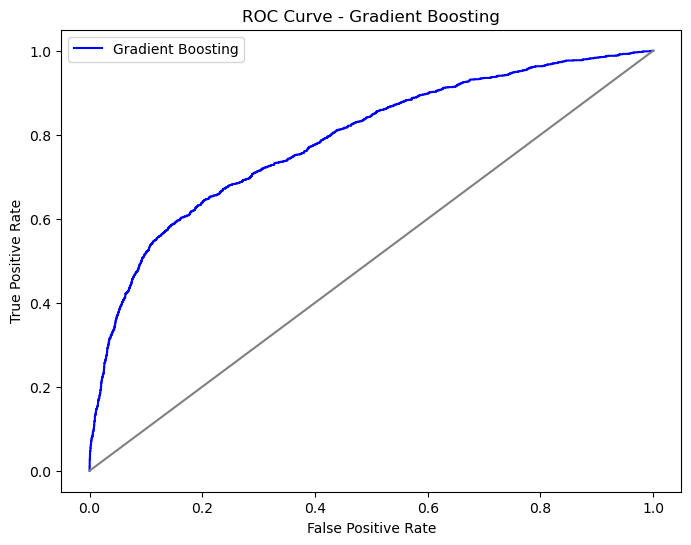

In [22]:
# Plotting ROC curve for Gradient Boosting
y_prob_gb = best_gb_classifier.predict_proba(X_test)[:, 1]
fpr_gb, tpr_gb, thresholds_gb = roc_curve(y_test, y_prob_gb)
plt.figure(figsize=(8, 6))
plt.plot(fpr_gb, tpr_gb, color='blue', label='Gradient Boosting')
plt.plot([0, 1], [0, 1], color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Gradient Boosting')
plt.legend()
plt.show()

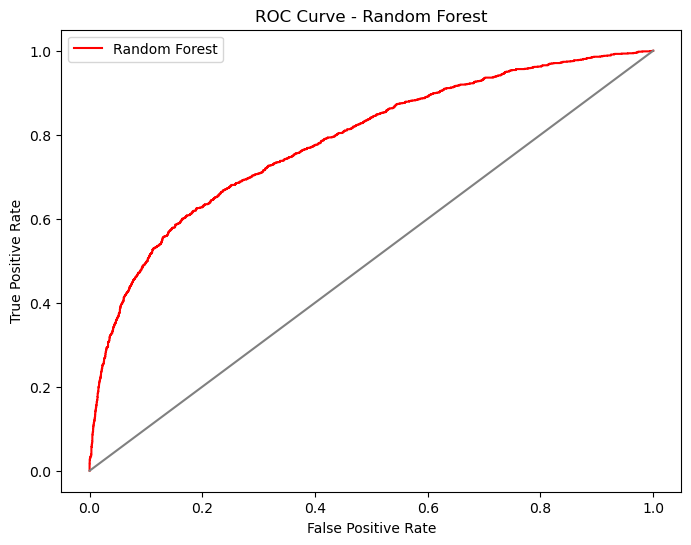

In [23]:
# Plotting ROC curve for Random Forest
y_prob_rf = best_rf_classifier.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_prob_rf)
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color='red', label='Random Forest')
plt.plot([0, 1], [0, 1], color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend()
plt.show()